In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use({'figure.facecolor':'white'})

In [34]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Название переменной - Тип данных - Описание

*Date* - дата(год:месяц:день) - дата наблюдения,

*Location* - строка - название месторасположения метеостанции,

*MinTemp* - вещественный - минимальная температура в градусах цельсия,

*MaxTemp* - вещественный - максимальная температура в градусах цельсия,

*Rainfall* - вещественный - количество осадков, зафиксированных за день в мм,

*Evaporation* - вещественный - количество испарений (мм) в эвапорометре за 24 часа до 9 утра,

*Sunshine* - целочисленный - количество солнечных часов за день,

*WindGustDir* - категориальный - направление сильнейшего порыва ветра за 24 часа до полуночи,

*WindGustSpeed* - вещественный - скорость самого сильного ветра (км/ч) за 24 часа до полуночи,

*WindDir9am* - категориальный - направление ветра в 09:00,

*WindDir3pm* - категориальный - направление ветра в 15:00,

*WindSpeed9am* - вещественный - средняяя скорость ветра за 10 минут до 09:00,

*WindSpeed3pm* - вещественный - средняяя скорость ветра за 10 минут до 15:00,

*Humidity9am* - вещественный - влажность (в процентах) в 09:00,

*Humidity3pm* - вещественный - влажность (в процентах) в 15:00,

*Pressure9am* - вещественный - атмосферное давление (гПа) над уровнем моря в 09:00,

*Pressure3pm* - вещественный - атмосферное давление (гПа) над уровнем моря в 15:00,

*Cloud9am* - целочисленный - сколько окт (восьмых частей неба) закрыты облаками в 09:00,

*Cloud3pm* - целочисленный - сколько окт (восьмых частей неба) закрыты облаками в 15:00,

*Temp9am* - вещественный - температура (градусы Цельсия) в 09:00,

*Temp3pm* - вещественный - температура (градусы Цельсия) в 15:00,

*RainToday* - категориальный - логическое значение: 1, если количество осадков (мм)
              за 24 часа до 9 утра превышает 1 мм, в противном случае - 0,

*RISK_MM* - вещественный - количество осадков на следующий день в мм, используется для создания таргетной переменной  *RainTomorrow*,
            своеобразная мера «риска»,

*RainTomorrow* - категориальный - логическое значение, будет ли завтра дождь,


Посмотрим информацию про заполненность таблицы и типы данных

In [35]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Посмотрим основные статистики признаков:

In [36]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


При первом осмотре заметил, что у колонок *Cloud9am*, *Cloud3pm* максимальные значения равняются 9,
хотя по описанию этого признака максимальное значение может равняться 8-ми. Отфильтруем эти значения.


In [37]:
weather_data[~((weather_data.Cloud3pm > 8)|
             (weather_data.Cloud9am > 8))].count()

Date             142190
Location         142190
MinTemp          141553
MaxTemp          141868
Rainfall         140784
Evaporation       81348
Sunshine          74374
WindGustDir      132861
WindGustSpeed    132921
WindDir9am       132177
WindDir3pm       138412
WindSpeed9am     140842
WindSpeed3pm     139560
Humidity9am      140416
Humidity3pm      138580
Pressure9am      128176
Pressure3pm      128209
Cloud9am          88533
Cloud3pm          85097
Temp9am          141286
Temp3pm          139464
RainToday        140784
RISK_MM          142190
RainTomorrow     142190
dtype: int64

Как видим, таких погодных измерений только 3.


In [38]:
weather_data = weather_data[~((weather_data.Cloud3pm > 8)|
                            (weather_data.Cloud9am > 8))].copy()

Переведем дату в datetime тип, Pressure9am в float64:

In [39]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data.Pressure9am.astype('float64')

0         1007.7
1         1010.6
2         1007.6
3         1017.6
4         1010.8
           ...  
142188    1024.7
142189    1024.6
142190    1023.5
142191    1021.0
142192    1019.4
Name: Pressure9am, Length: 142190, dtype: float64

Перед тем, как заполнять пропуски, посмотрим на распределения,
чтобы заранее зачистить их от выбросов, которые могут повлиять на среднее при заполнении пропусков.

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RISK_MM'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

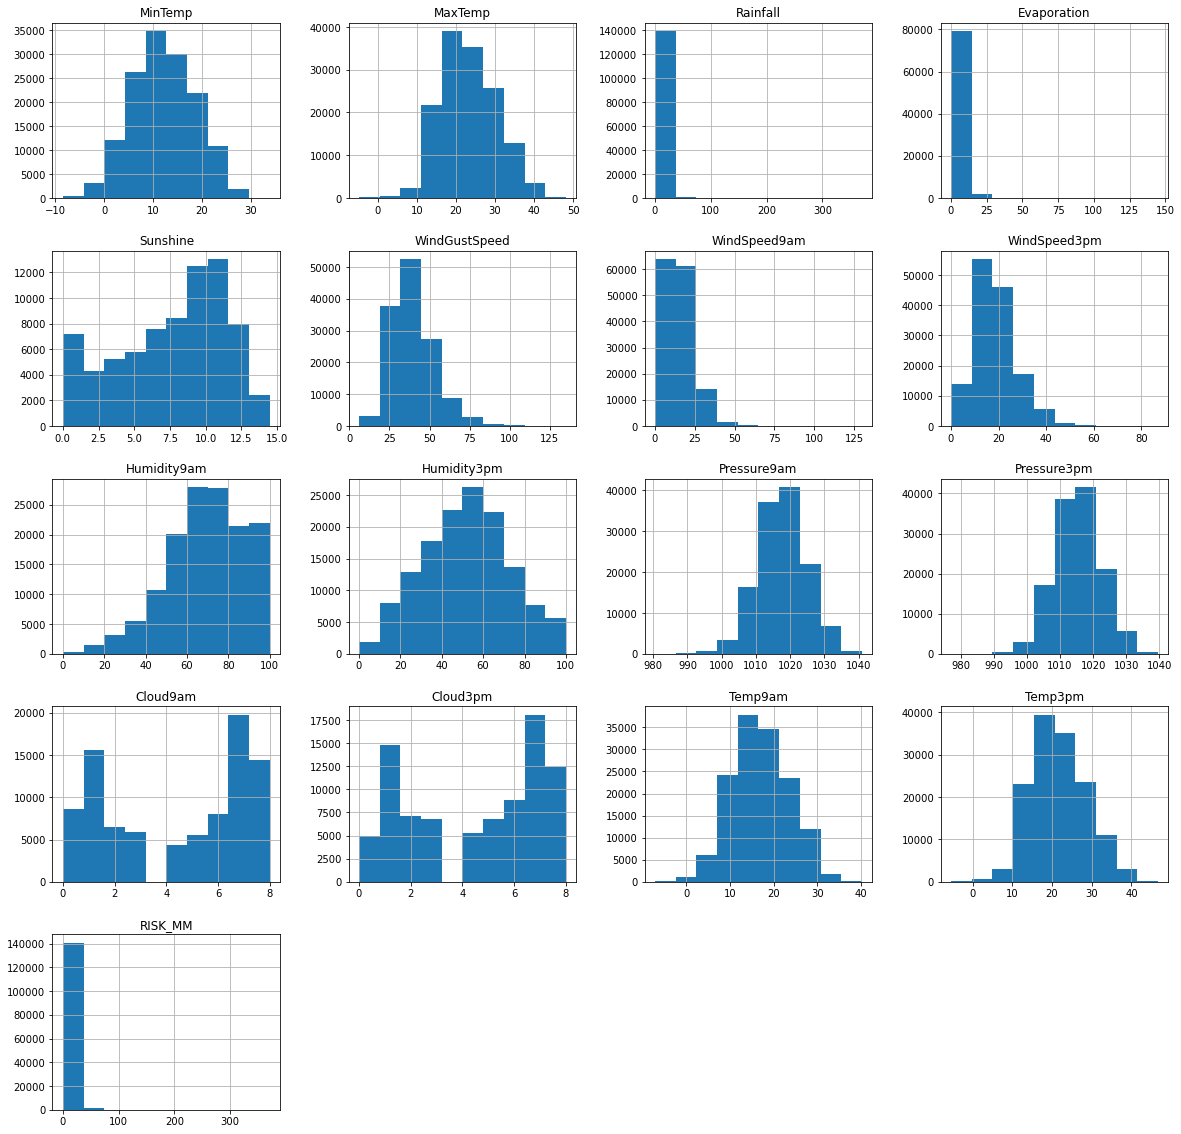

In [40]:
weather_data.hist(figsize=(20, 20))

Логарифмируем признаки *Rainfall*, *Evaporation*, что делалось при визуальном анализе в ноутбуке visualize.ipnb

In [41]:
weather_data['Rainfall'] = np.log1p(weather_data['Rainfall'])
weather_data['Evaporation'] = np.log1p(weather_data['Evaporation'])

Сильные выбросы наблюдаются в *Rainfall*, *Evaporation*, *WindSpeed*. Выбросы в данных
признаках могут соответствовать каким-то особенным дням, в которых погодные нормы были сильно нарушены. Поэтому
необходимости в наличии данных об аномальных днях нету, их можно убрать. Воспользуемся фильтрацией по "усам"
графика boxplot. То есть высчитаем для каждой колонки 25 и 75 процентили (Q1, Q3), их разность и зададим диапазон допустимых
значений, как  [Q1 - 1.5*(Q3-Q1), Q3 + 1.5*(Q3 - Q1)].

In [42]:
num_columns = weather_data.select_dtypes(include=np.number).columns.tolist()
# При расчете не будем учитывать облачность, так как даный тип данных скорее категориальный и
# риск, так как данный тип данных в последствии будет удален из таблицы
num_columns = [i for i in num_columns if i not in ['Cloud9am', 'Cloud3pm','RISK_MM']]
num_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [43]:
Q1 = weather_data[num_columns].quantile(0.25)
Q3 = weather_data[num_columns].quantile(0.75)
IQR = Q3 - Q1

In [44]:
weather_data = weather_data[~((weather_data[num_columns] < (Q1 - 1.5 * IQR)) |
                                          (weather_data[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)].copy()

In [45]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114957 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           114957 non-null  datetime64[ns]
 1   Location       114957 non-null  object        
 2   MinTemp        114413 non-null  float64       
 3   MaxTemp        114686 non-null  float64       
 4   Rainfall       113664 non-null  float64       
 5   Evaporation    65827 non-null   float64       
 6   Sunshine       59874 non-null   float64       
 7   WindGustDir    107500 non-null  object        
 8   WindGustSpeed  107540 non-null  float64       
 9   WindDir9am     106227 non-null  object        
 10  WindDir3pm     111882 non-null  object        
 11  WindSpeed9am   113821 non-null  float64       
 12  WindSpeed3pm   112808 non-null  float64       
 13  Humidity9am    113588 non-null  float64       
 14  Humidity3pm    112076 non-null  float64       
 15  

Создадим отдельные колонки для дня, месяца и года

In [46]:
weather_data['Day'] = weather_data.Date.dt.day
weather_data['Month'] = weather_data.Date.dt.month
weather_data['Year'] = weather_data.Date.dt.year
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.470004,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.000000,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.000000,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.000000,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,0.693147,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,5,12,2008


Необходимо каким то образом заполнить пропуски в данных, самым логичным наверно является проинтерполировать значения по
временному ряду для каждой метеостанции.

In [47]:
locs = weather_data.Location.unique()
for loc in locs:
    weather_data[weather_data.Location == loc].set_index('Date').\
                                    interpolate(method='time',  limit_direction='both').reset_index(inplace=True)

In [48]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114957 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           114957 non-null  datetime64[ns]
 1   Location       114957 non-null  object        
 2   MinTemp        114413 non-null  float64       
 3   MaxTemp        114686 non-null  float64       
 4   Rainfall       113664 non-null  float64       
 5   Evaporation    65827 non-null   float64       
 6   Sunshine       59874 non-null   float64       
 7   WindGustDir    107500 non-null  object        
 8   WindGustSpeed  107540 non-null  float64       
 9   WindDir9am     106227 non-null  object        
 10  WindDir3pm     111882 non-null  object        
 11  WindSpeed9am   113821 non-null  float64       
 12  WindSpeed3pm   112808 non-null  float64       
 13  Humidity9am    113588 non-null  float64       
 14  Humidity3pm    112076 non-null  float64       
 15  

К сожалению, пропуски всё еще присутствуют. Это означает, что для некоторых метеостанций подобных наблюдений, значения в
которых отсутствуют, вообще не проводилось.

Можно выкинуть эти метеостанции, можно выкинуть эти колонки, а можно заполнить всё какими нибудь усредненными по годам
значениями по разным станциям.

Отсутствующие значения заполним средним за этот день по всем годам и метеостанциям. За исключением колонок
*Evaporation*, *Sunshine*, *Cloud9am*, *Cloud3pm*. Так как в этих данных много пропусков, и так как эти пропуски
соответствуют метеостанциям, на которых вообще подобных измерений не производилось. Данные пропуски попробуем потом
заполнить MICE алгоритмом похже.

In [49]:
numeric_columns = weather_data.select_dtypes(include=np.number).columns.tolist()
numeric_columns = [i for i in numeric_columns if i not in ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']]
weather_data[[i for i in numeric_columns if i not in ['Month', 'Day']]]= weather_data[numeric_columns]. \
                                groupby(['Month', 'Day']).transform(lambda group: group.fillna(group.mean()))
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114957 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           114957 non-null  datetime64[ns]
 1   Location       114957 non-null  object        
 2   MinTemp        114957 non-null  float64       
 3   MaxTemp        114957 non-null  float64       
 4   Rainfall       114957 non-null  float64       
 5   Evaporation    65827 non-null   float64       
 6   Sunshine       59874 non-null   float64       
 7   WindGustDir    107500 non-null  object        
 8   WindGustSpeed  114957 non-null  float64       
 9   WindDir9am     106227 non-null  object        
 10  WindDir3pm     111882 non-null  object        
 11  WindSpeed9am   114957 non-null  float64       
 12  WindSpeed3pm   114957 non-null  float64       
 13  Humidity9am    114957 non-null  float64       
 14  Humidity3pm    114957 non-null  float64       
 15  

Так, теперь посмотрим на категориальные признаки:

In [50]:
weather_data.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114957 entries, 0 to 142192
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Location      114957 non-null  object
 1   WindGustDir   107500 non-null  object
 2   WindDir9am    106227 non-null  object
 3   WindDir3pm    111882 non-null  object
 4   RainToday     113664 non-null  object
 5   RainTomorrow  114957 non-null  object
dtypes: object(6)
memory usage: 6.1+ MB


Видим, что пропуски есть везде, кроме *Location* и *RainTomorrow*, *RainToday*.
*Nan* в признаках с напрвлением ветра заменим на самые популярные направления ветра

In [51]:
weather_data[['WindGustDir', 'WindDir9am', 'WindDir3pm']] = weather_data[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month', 'Day']]. \
                                groupby(['Month', 'Day']).transform(lambda group: group.fillna(group.value_counts().index[0]))

Посмотрим на количество категорий в каждом категориальном признаке:

In [52]:
for column in weather_data.select_dtypes('object').columns.tolist():
    print(weather_data[column].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'N' 'NNE' 'ENE' 'SSE' 'S' 'SW' 'NNW' 'SE' 'NW' 'E'
 'SSW' 'ESE']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'E' 'SSW' 'ESE' 'N' 'NW' 'WSW'
 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SE' 'N' 'SW' 'SSW' 'S'
 'NNE' 'NE']
['No' 'Yes' nan]
['No' 'Yes']


Видим, что количество категорий довольно большое. Надо думать, как их кодировать.
С направлением ветра можно в качестве вещественного значения использовать угол направления ветра в радианах. Единственное,
что мне не понятно, является ли пропущенное значение в направлении ветра - отсутствием ветра. Так как на каггле об этом нет
информации, то не буду ничего выдумывать и заполню пропуски, как и раньше для вещественных значений.

Для метеостанций всё сложнее намного. Вроде бы самым очевидным является one-hot кодирование,но, во-первых,
у нас довольно много их, поэтому матрица признаков получится уж больно разреженная, во-вторых, многие метеостанции
расположены в одном городе, к сожалению, из названия автоматически вычленить эту информацию нельзя. Можно собрать
их координаты в широте и долготе (вручную естесно) и кластеризовать, но в качестве расстояния правдивее использовать тогда формулу
расстояния Гаверсина, которая учитывает искажение Земли. Вообщем всё сложно, не будем углубляться в дебри и
сделаем обычное one-hot кодирование.

In [53]:
one_hot = pd.get_dummies(weather_data['Location'])
weather_data = weather_data.join(one_hot)

Отлично, теперь напишем словарик для замены значений в наших ветрах, плюс таргетную переменную тоже заменим на 0, 1

In [54]:
weather_data.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'N', 'NNE', 'ENE', 'SSE', 'S', 'SW',
       'NNW', 'SE', 'NW', 'E', 'SSW', 'ESE'], dtype=object)

In [55]:
winddir = {'W': 270.0, 'WNW': 292.5, 'WSW': 247.5, 'NE': 45.0, 'NNW': 337.5,
           'N': 0.0, 'NNE': 22.5, 'SW': 225.0, 'ENE': 67.5, 'SSE': 157.5,
           'S': 180.0, 'NW': 315.0, 'SE': 135.0, 'ESE': 112.5, 'E': 90.0, 'SSW':202.5,
           'Yes': 1, 'No': 0}
weather_data.replace(winddir, inplace=True)
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,2008-12-01,Albury,13.4,22.9,0.470004,NaN,NaN,270.0,44.0,270.0,...,0,0,0,0,0,0,0,0,0,0
1,2008-12-02,Albury,7.4,25.1,0.000000,NaN,NaN,292.5,44.0,337.5,...,0,0,0,0,0,0,0,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.000000,NaN,NaN,247.5,46.0,270.0,...,0,0,0,0,0,0,0,0,0,0
3,2008-12-04,Albury,9.2,28.0,0.000000,NaN,NaN,45.0,24.0,135.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,0.693147,NaN,NaN,270.0,41.0,67.5,...,0,0,0,0,0,0,0,0,0,0


In [56]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114957 entries, 0 to 142192
Data columns (total 76 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              114957 non-null  datetime64[ns]
 1   Location          114957 non-null  object        
 2   MinTemp           114957 non-null  float64       
 3   MaxTemp           114957 non-null  float64       
 4   Rainfall          114957 non-null  float64       
 5   Evaporation       65827 non-null   float64       
 6   Sunshine          59874 non-null   float64       
 7   WindGustDir       114957 non-null  float64       
 8   WindGustSpeed     114957 non-null  float64       
 9   WindDir9am        114957 non-null  float64       
 10  WindDir3pm        114957 non-null  float64       
 11  WindSpeed9am      114957 non-null  float64       
 12  WindSpeed3pm      114957 non-null  float64       
 13  Humidity9am       114957 non-null  float64       
 14  Humi

Посмотрим на гистограмму осадков в мм (*Rainfall*) в зависимости от бинарного признака RainToday
(был ли в этот день дождь)

<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

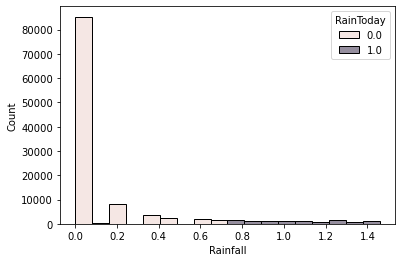

In [57]:
sns.histplot(x=weather_data.Rainfall, hue=weather_data.RainToday)

Видим, что большинство значений мм осадков находятся в нуле, это не очень удобное распределение для алгоритмов,
поэтому лучше из этих двух признаков оставить только бинарный *RainToday*, который, судя по гистограмме,
принимает значение 1 только в том случае, если осадков было больше 0.6, думаю, что такой эвристики хватит для
заполнения пропусков.

In [58]:
weather_data[weather_data.Rainfall > 0.6].RainToday.fillna(1.0, inplace=True)
weather_data.RainToday.fillna(0.0, inplace=True)


D:\Anaconda\envs\myenv\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Удалим столбец *Rainfall*:

In [59]:
weather_data.drop(columns=['Rainfall'], inplace=True)

Здорово, теперь избавляемся от ненужных колонок: *Location*, *RISK_MM*,  *Date*.

In [60]:
weather_data.drop(columns=['Location', 'RISK_MM', 'Date'], inplace=True)

В наших кодировках признаков, тем не менее, присутствует одна неточность. Если посмотреть на значения
столбцов *Month*, *Day*, *WindDir...*, то можно обнаружить, что значения в них цикличны, то есть расстояние
между, допустим, 31 днем и 1-ым фактически меньше, чем между 31-ым и 25-ым.
Чтобы добиться этой же цикличности в наших кодировках данных признаков, можно разложить эти данные на значения
синуса и косинуса, преобразовав значения признаков в радианы.
Таким образом, для столбцов  *Month* и *Day* формулы преобразования признаков будут следующие:

$component_{sin} = sin(\frac{2\cdot\pi\cdot value}{value_{max}})$,
$component_{cos} = cos(\frac{2\cdot\pi\cdot value}{value_{max}})$

In [61]:
weather_data['Month_sin'] = np.sin(2*np.pi*weather_data.Month/12)
weather_data['Month_cos'] = np.cos(2*np.pi*weather_data.Month/12)

weather_data['Day_sin'] = np.sin(2*np.pi*weather_data.Day/31)
weather_data['Day_cos'] = np.cos(2*np.pi*weather_data.Day/31)

for wind_dir in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    weather_data[f'{wind_dir}_sin'] = np.sin(2*np.pi*weather_data[wind_dir]/360)
    weather_data[f'{wind_dir}_cos'] = np.cos(2*np.pi*weather_data[wind_dir]/360)

weather_data.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Month_sin,Month_cos,Day_sin,Day_cos,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,NaN,NaN,270.0,44.0,270.0,292.5,20.0,24.0,...,-2.449294e-16,1.0,0.201299,0.979530,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,NaN,NaN,292.5,44.0,337.5,247.5,4.0,22.0,...,-2.449294e-16,1.0,0.394356,0.918958,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,NaN,NaN,247.5,46.0,270.0,247.5,19.0,26.0,...,-2.449294e-16,1.0,0.571268,0.820763,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,NaN,NaN,45.0,24.0,135.0,90.0,11.0,9.0,...,-2.449294e-16,1.0,0.724793,0.688967,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,NaN,NaN,270.0,41.0,67.5,315.0,7.0,20.0,...,-2.449294e-16,1.0,0.848644,0.528964,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01


In [62]:
weather_data.drop(columns=['Month', 'Day', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],
                  inplace=True)

Теперь вернемся к колонкам *Evaporation*, *Sunshine*, *Cloud9am*, *Cloud3pm*. Как уже говорилось ранее, в этих колонках
пропущенные значения соответствуют метеостанциям, на которых подобных измерений вообще не проводилось. Поэтому на ходу
придумать какую то эвристику для заполнения пропусков не получается. В таких ситуациях можно использовать MICE метод,
суть которого состоит в том, что алгоритм итеративно выбирает переменную, содержащую пропуски, пропускам в других
переменных присваивает среднее значение, обучает заранее определенный алгоритм на регрессию по рассматриваемой в данный
момент переменной, предсказывает для неё значения, и двигается к следующим переменным с пропущенными значениями. Количество
таких проходов по переменным с пропущенными значениями задается заранее, по умолчанию стоит 10 проходов.

In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

max_values = [weather_data[i].max() for i in weather_data.columns]
min_values = [weather_data[i].min() for i in weather_data.columns]
weather_full_data = weather_data.copy(deep=True)
mice_imputer = IterativeImputer(max_value=max_values, min_value=min_values)
weather_full_data.iloc[:, :] = mice_imputer.fit_transform(weather_data)

In [64]:
weather_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114957 entries, 0 to 142192
Data columns (total 77 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MinTemp           114957 non-null  float64
 1   MaxTemp           114957 non-null  float64
 2   Evaporation       114957 non-null  float64
 3   Sunshine          114957 non-null  float64
 4   WindGustSpeed     114957 non-null  float64
 5   WindSpeed9am      114957 non-null  float64
 6   WindSpeed3pm      114957 non-null  float64
 7   Humidity9am       114957 non-null  float64
 8   Humidity3pm       114957 non-null  float64
 9   Pressure9am       114957 non-null  float64
 10  Pressure3pm       114957 non-null  float64
 11  Cloud9am          114957 non-null  float64
 12  Cloud3pm          114957 non-null  float64
 13  Temp9am           114957 non-null  float64
 14  Temp3pm           114957 non-null  float64
 15  RainToday         114957 non-null  float64
 16  RainTomorrow      11

Посмотрим на распределение таргетного класса в наборе данных.

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

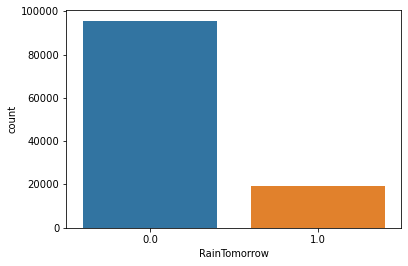

In [65]:
sns.countplot(weather_full_data.RainTomorrow)

Видим, что классы несбланасированы. При обучении алгоритмов лучше использовать стратифицированное разбиение на
фолды.


Сохраним табличку, а то пичарму уже плохо.

In [66]:
weather_full_data.to_csv('weather_preprocessed.csv',
                    index=False)
